In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(1)

In [3]:
x0s = np.random.normal(loc=3, size=(1000, 2)) # examples for class 0
y0s = np.zeros(1000)                          # labels for class 0
x1s = np.random.normal(loc=6, size=(1000, 2)) # examples for class 1
y1s = np.ones(1000)                           # labels for class 1
x2s = np.random.normal(loc=9, size=(1000, 2)) # examples for class 2
y2s = np.full(1000, 2.)                       # labels for class 2

In [4]:
xs = np.concatenate((x0s, x1s, x2s)) #all examples
ys = np.concatenate((y0s, y1s, y2s)) #all labels

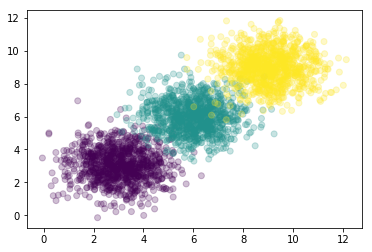

In [5]:
plt.scatter(xs[:,0], xs[:,1], c=ys, alpha=0.25)
plt.show()

$e_n = - \sum^M_{m=1} y_{n,m} \log(\hat{y}_{n,m})$

In [6]:
def calc_error(y_hat, y, eps=1e-10):
    """
    Cross-entropy loss between labels, y, and predictions, y_hat 
    """
    error = - np.sum([_y*np.log(_y_hat + eps) for (_y, _y_hat) in zip(y, y_hat)])
    
    return error

In [7]:
print(calc_error([0.2, 0.2, 0.6], [0, 0, 1]))

print(calc_error([0.1, 0.1, 0.8], [0, 0, 1]))

print(calc_error([0.05, 0.05, 0.9], [0, 0, 1]))

print(calc_error([0, 0, 1], [0, 0, 1]))

0.510825623599324
0.2231435511892097
0.10536051554671516
-1.000000082690371e-10


In [8]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x))

In [9]:
softmax([1, 2, 3])

array([0.09003057, 0.24472847, 0.66524096])

In [10]:
softmax([1000, 2000, 3000])

/home/ben/miniconda3/envs/pytorch04/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ben/miniconda3/envs/pytorch04/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([nan, nan, nan])

https://stackoverflow.com/questions/42599498/numercially-stable-softmax
https://stackoverflow.com/questions/34968722/how-to-implement-the-softmax-function-in-python

In [11]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / np.sum(e_x)

In [12]:
softmax([1, 2, 3])

array([0.09003057, 0.24472847, 0.66524096])

In [13]:
softmax([1000, 2000, 3000])

array([0., 0., 1.])

In [14]:
w = np.random.normal(size=(3,2))
b = np.random.normal(size=(3,1))

In [17]:
def predict(w, b, x):
    pred_vals = np.matmul(w, x)
    pred_vals = softmax(pred_vals)
    pred_class = np.argmax(pred_vals)
    return pred_vals, pred_class

In [21]:
predict(w, b, xs[0])

(array([4.13837282e-08, 1.67298610e-04, 9.99832660e-01]), 2)

In [38]:
def predicts(w, b, xs):
    pred_vals, pred_classes = map(np.array, zip(*[predict(w, b, x) for x in xs]))
    return pred_vals, pred_classes

In [40]:
y_hats, c_hats = predicts(w, b, xs)

In [41]:
n_correct = (c_hats == ys).sum()

print(n_correct)

1005


In [42]:
accuracy = n_correct / len(c_hats)

print(accuracy)

0.335


https://deepnotes.io/softmax-crossentropy
https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/
http://cs231n.github.io/convolutional-networks/

\begin{align*}
z &= w_0 x_0 + w_1 x_1 + b\\
\hat{y} &= \sigma (z)\\
\sigma (z_j) &= \frac{e^{z_j}}{\sum^K_{k=1}e^{z_k}} \\
e_n &= - \sum^M_{m=1} y_{n,m} \log(\hat{y}_{n,m}) \\
 &= - (y_{n,0} \log(\hat{y}_{n,0}) + y_{n,1} \log(\hat{y}_{n,1}) + y_{n,2} \log(\hat{y}_{n,2}))
\end{align*}

Derivative of softmax:

$$ \sigma (z_j) = \frac{e^{z_j}}{\sum^K_{k=1}e^{z_k}} $$

$$\frac{d\sigma (z_j)}{d z_j} = \frac{d}{d z_j} \frac{e^{z_j}}{\sum^K_{k=1}e^{z_k}} $$

When $i = j$:

$$ \frac{d}{d z_j} \sigma (z_j) = \frac{e^{z_j}}{\sum^K_{k=1}e^{z_k}} = \frac{e^{z_i} \sum^K_{k=1} e^{z_k} - e^{z_j}e^{z_i}}{(\sum^K_{k=1} e^z_k)^2} $$ 

$$=\frac{e^{z_i}(\sum^K_{k=1}e^{z_k}-e^{z_j})}{(\sum^K_{k=1}e^{z_k})^2}$$

$$=\frac{e^{z_j}}{\sum^K_{k=1}e^{z_k}} \frac{(\sum^K_{k=1}e^{z_k}-e^{z_j})}{\sum^K_{k=1}e^{z_k}}$$

$$=p_i(1-p_j)$$

When $i \neq j$:


$$ \frac{d}{d z_j} \sigma (z_j) = \frac{e^{z_j}}{\sum^K_{k=1}e^{z_k}} = \frac{0 - e^{z_j}e^{z_i}}{(\sum^K_{k=1} e^z_k)^2} $$ 

$$=\frac{-e^{z_j}}{\sum^K_{k=1}e^{z_k}} \frac{(\sum^K_{k=1}e^{z_i})}{\sum^K_{k=1}e^{z_k}}$$

$$=-p_j*p_i$$

For loss function:

$$L= - \sum_iy_i\log(p_i)$$

$$=\frac{d L}{\hat{y}_i} = -\sum^ky_k \frac{d \log (p_k)}{d \hat{y}_i}$$

$$=-\sum_ky_k\frac{d \log(p_k)}{d p_k} \times \frac{d p_k}{\hat{y_i}}$$


$$=- \sum y_k \frac{1}{p_k} \times \frac{d p_k}{d o_i}$$

From the softmax derivation earlier:

$$\frac{d L}{d o_i} = -y_i(1-p_i)-\sum_{k \neq i} y_k \frac{1}{p_k}(-p_kp_i)$$

$$

In [44]:
def gradient_step(w, b, xs, ys, eta=0.1):
    """
    Performs one gradient descent step using all of the data points
    pred_w0 (float): predicted w0 value
    pred_w1 (float): predicted w1 value
    pred_b (float): predicted b value
    xs (ndarray[float,float]): x values for data points
    ys (ndarray[float]): y values for data points
    eta (float): learning rate
    """
    
    N = len(xs) #number of examples, used to average gradients
    grads_w0 = [0, 0, 0]
    grads_w1 = [0, 0, 0]
    grads_b = [0, 0, 0]
    
    for x, y in zip(xs, ys):
        y_hat, _ = predict(w, b, x) #get prediction
        
        #de = ? #derivative of error w.r.t. prediction
        #dz = ? #derivative of softmax
        
        
        #de = (y_hat - y) / (y_hat * (1 - y_hat)) #derivative of error w.r.t. prediction 
        #dz = y_hat * (1 - y_hat) #derivative of sigmoid
        dedz = y_hat - y #simplified equation for the two derivatives above
        dw0 = x[0] #derivative of sigmoid w.r.t w0
        dw1 = x[1] #derivative of sigmoid w.r.t w1
        grad_w0 += (1/N) * dedz * dw0 #summing averaged gradients for w0
        grad_w1 += (1/N) * dedz * dw1 #summing averaged gradients for w1
        grad_b += (1/N) * dedz #summing averaged gradients for b
        
    new_w0 = pred_w0 - (eta * grad_w0) #parameter update for w0
    new_w1 = pred_w1 - (eta * grad_w1) #parameter update for w1
    new_b = pred_b - (eta * grad_b) #parameter update for b
    
    return new_w0, new_w1, new_b

In [45]:
gradient_step(w, b, xs, ys)

[4.13837282e-08 1.67298610e-04 9.99832660e-01]


AssertionError: 